In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
np.set_printoptions(suppress=True)

In [106]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем точки в диапазоне от 0 до 2*pi в количестве n_support штук
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой точки посчитаем y = sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support просемплируем n_train точек (с возвратом?), это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получится целевая переменная
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size = data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 25)

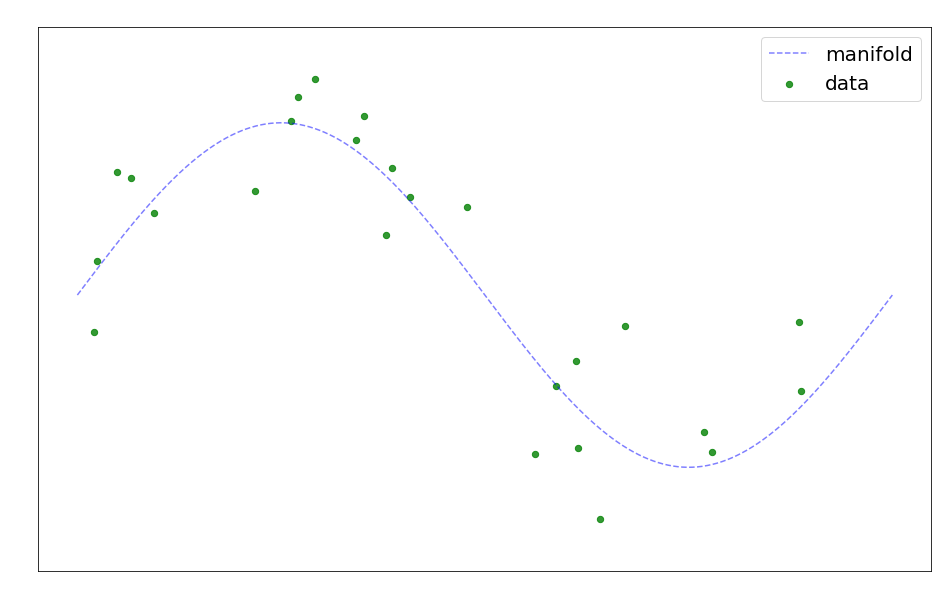

In [61]:
margin = 0.3
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

ax.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
ax.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

ax.set_xlim(data['support'].min() - margin, data['support'].max() + margin)
ax.set_ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
ax.legend(loc='upper right', prop={'size':20})
ax.set_title("True manifold and noised data")
ax.title.set_size(20)
ax.title.set_color('white')
ax.tick_params(colors = 'w')

plt.show()

А теперь реализуем алгоритм обучения, используя магию NumPy:
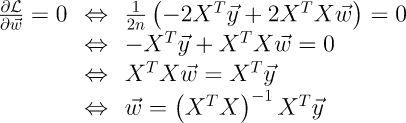

In [71]:
# добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

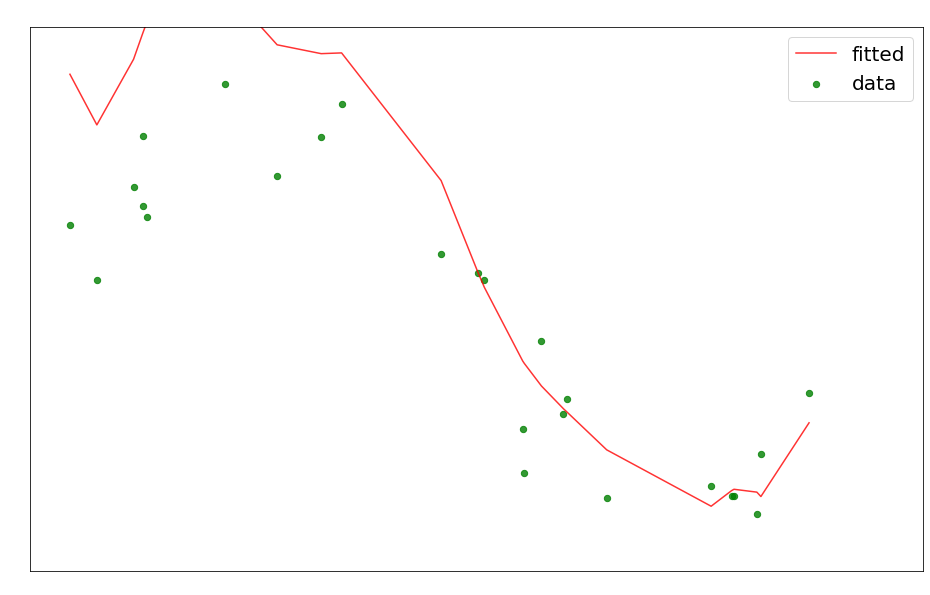

mse: 0.233, rmse: 0.483


In [115]:
margin = 0.3
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

#ax.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
ax.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

ax.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

ax.set_xlim(data['support'].min() - margin, data['support'].max() + margin)
ax.set_ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
ax.legend(loc='upper right', prop={'size':20})
ax.set_title("Fitted linear regression")
ax.title.set_size(20)
ax.title.set_color('white')
ax.tick_params(colors = 'w')

plt.show()
err = mse(data['y_train'],y_hat)
print(f"mse: {err:.3f}, rmse: {np.sqrt(err):.3f}")

Полиномиальная регрессия

В линейной регрессии мы ограничивали пространство гипотез только линейными функциями от признаков. Давайте теперь расширим пространство гипотез до всех полиномов степени $p$. Тогда в нашем случае, когда количество признаков равно одному $m=1$, пространство гипотез будет выглядеть следующим образом:
$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\ &=& \sum_{i=0}^p w_i x^i \end{array}$


Если заранее предрассчитать все степени признаков, то задача опять сводится к описанному выше алгоритму — методу наименьших квадратов. Попробуем отрисовать графики нескольких полиномов разных степеней.


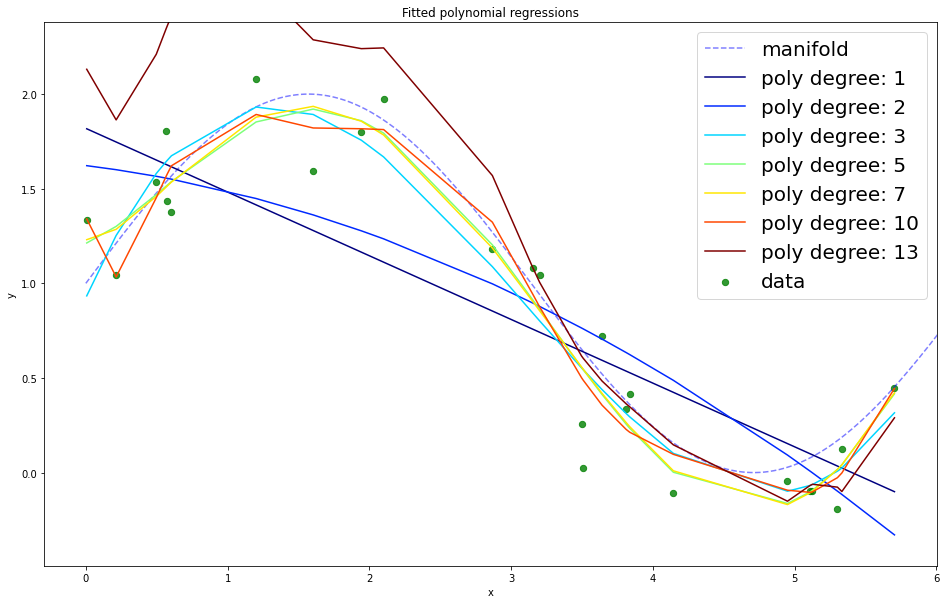

In [107]:
# список степеней p полиномов, который мы протестируем
degree_list = [1, 2, 3, 5, 7, 10, 13]

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
fig = plt.figure(figsize=(16,10))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [114]:
degree = 3
dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
np.array(dlist).T
#X = np.array(dlist).T
#X

array([[  1.        ,   0.00628947,   0.00003956,   0.00000025],
       [  1.        ,   0.21384214,   0.04572846,   0.00977867],
       [  1.        ,   0.49686851,   0.24687831,   0.12266606],
       [  1.        ,   0.56605273,   0.32041569,   0.18137218],
       [  1.        ,   0.57234221,   0.3275756 ,   0.18748534],
       [  1.        ,   0.60378958,   0.36456186,   0.22011865],
       [  1.        ,   1.20128968,   1.4430969 ,   1.73357742],
       [  1.        ,   1.60381607,   2.57222598,   4.12537737],
       [  1.        ,   1.94344771,   3.77698899,   7.3403806 ],
       [  1.        ,   2.10068458,   4.41287569,   9.27005991],
       [  1.        ,   2.8680005 ,   8.22542687,  23.59052838],
       [  1.        ,   3.15102687,   9.92897031,  31.28645219],
       [  1.        ,   3.20134266,  10.24859485,  32.80926395],
       [  1.        ,   3.49694798,  12.22864517,  42.762936  ],
       [  1.        ,   3.50952693,  12.31677926,  43.22606849],
       [  1.        ,   3